# InSituPy demonstration
Example dataset: https://www.10xgenomics.com/products/xenium-in-situ/preview-dataset-human-breast

In [1]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

In [2]:
from insitupy import XeniumData
from pathlib import Path
import scanpy as sc

## Load data

In [3]:
# input directories
data_dirs = [
    Path("C:/Users/ge37voy/data/2301_CRC/2301-01_20230504/01_xenium_data/output-XETG00050__0003621__Region_1__20230504__121954"),
    Path("C:/Users/ge37voy/data/datasets/Xenium_FFPE_Human_Breast_Cancer_Rep1_outs/output-XETG00000__slide_id__sample_id/"),
    Path("C:/Users/ge37voy/data/20230811__134602__2314_OTCs_Wollenberg/output-XETG00050__0003555__OTC0304-1__20230811__134819")
]

In [4]:
img_dirs = [elem.parent / "unregistered_images" for elem in data_dirs]

In [5]:
i = 0
data_dir = data_dirs[i]
img_dir = img_dirs[i]

In [6]:
data_dir

WindowsPath('C:/Users/ge37voy/data/2301_CRC/2301-01_20230504/01_xenium_data/output-XETG00050__0003621__Region_1__20230504__121954')

In [7]:
xd = XeniumData(data_dir)

In [8]:
xd

XeniumData
Slide ID:	0003621
Region ID:	Region_1
Data path:	C:\Users\ge37voy\data\2301_CRC\2301-01_20230504\01_xenium_data
Data folder:	output-XETG00050__0003621__Region_1__20230504__121954
Metadata file:	experiment_modified.xenium

## Read different data modalities

In [9]:
xd.read_all()

Running read_annotations()
Running read_boundaries()
Running read_images()
Running read_matrix()
Running read_transcripts()


In [9]:
xd.read_annotations()
xd.read_images()
xd.read_matrix()

### Show overview of data

In [10]:
xd

XeniumData
Slide ID:	0003621
Region ID:	Region_1
Data path:	C:\Users\ge37voy\data\2301_CRC\2301-01_20230504\01_xenium_data
Data folder:	output-XETG00050__0003621__Region_1__20230504__121954
Metadata file:	experiment_modified.xenium
    ➤ images
       nuclei:	(27352, 34139)
       HE:	(27352, 34139, 3)
       panCK:	(27352, 34139, 3)
    ➤ matrix
       AnnData object with n_obs × n_vars = 151305 × 280
	       obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
	       var: 'gene_ids', 'feature_types', 'genome'
	       obsm: 'spatial'
    ➤ transcripts
	   DataFrame with shape 17647545 x 10
    ➤ boundaries
       cells
       nuclei
    ➤ annotations
       tanja:	41 annotations, 5 classes ('Tumor', 'Fat', 'Mucus', 'Immune cells', 'Peritumoral Zone') 

## View data interactively

In [12]:
xd.show()

Viewer(camera=Camera(center=(0.0, 2906.04375, 3627.1625), zoom=0.10705251910326714, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(1.0, 1.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=2, ndisplay=2, last_used=0, range=((0.0, 5812.299999999999, 0.2125), (0.0, 7254.537499999999, 0.2125)), current_step=(13675, 17069), order=(0, 1), axis_labels=('0', '1')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'nuclei' at 0x2060e65fd30>, <Image layer 'HE' at 0x2060e6ba5e0>, <Image layer 'panCK' at 0x2060ec547f0>], help='use <2> for transform', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari', mouse_over_canvas=False, mouse_move_callbacks=[], mouse_drag_callbacks=[], mouse_double_click_callbacks=[], mouse_wheel_callbacks=[<function dims_scroll at 0x00000205C7C913A0>], _persisted_mouse_event={}, _mouse_drag_gen={}, _mouse_wheel_gen={}, keymap

### Crop data

In [13]:
xx = xd.crop(shape_layer="Shapes", inplace=False)

napari.Viewer: napari


c:\Users\ge37voy\AppData\Local\miniconda3\envs\xparse\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [65]:
xx.show()

Viewer(camera=Camera(center=(0.0, 432.54375000000005, 651.9499999999999), zoom=0.37006009834274267, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(1.0, 1.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=2, ndisplay=2, last_used=0, range=((0.0, 865.3000000000001, 0.2125), (0.0, 1304.1125, 0.2125)), current_step=(2035, 3068), order=(0, 1), axis_labels=('0', '1')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'nuclei' at 0x2520d04cdf0>, <Image layer 'HE' at 0x2508af26460>, <Image layer 'panCK' at 0x2520edd1880>], help='use <2> for transform', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari', mouse_over_canvas=False, mouse_move_callbacks=[], mouse_drag_callbacks=[], mouse_double_click_callbacks=[], mouse_wheel_callbacks=[<function dims_scroll at 0x00000250014D9A60>], _persisted_mouse_event={}, _mouse_drag_gen={}, _mouse_wheel_gen={}, 

## Perform preprocessing steps

In [14]:
xx.normalize(transformation_method="sqrt")
#xx.hvg()
xx.reduce_dimensions(umap=True, tsne=False)

Store raw counts in anndata.layers['counts']...
Normalization, log-transformation...
Dimensionality reduction...
Leiden clustering...


c:\Users\ge37voy\AppData\Local\miniconda3\envs\xparse\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
c:\Users\ge37voy\AppData\Local\miniconda3\envs\xparse\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
c:\Users\ge37voy\AppData\Local\miniconda3\envs\xparse\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


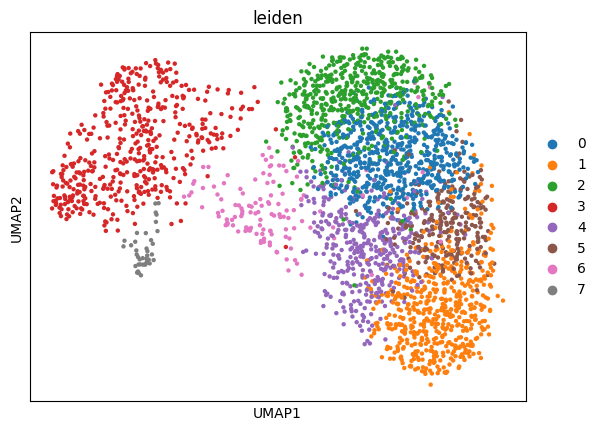

In [15]:
sc.pl.umap(xx.matrix, color="leiden")

In [71]:
xx.show()

Viewer(camera=Camera(center=(0.0, 344.0375, 481.20625), zoom=1.2128338525422735, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(1.0, 1.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=2, ndisplay=2, last_used=0, range=((0.0, 688.2875, 0.2125), (0.0, 962.625, 0.2125)), current_step=(1619, 2264), order=(0, 1), axis_labels=('0', '1')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'nuclei' at 0x1a612167910>, <Image layer 'HE' at 0x1a612269940>, <Image layer 'panCK' at 0x1a61e6c3520>], help='use <2> for transform', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari', mouse_over_canvas=False, mouse_move_callbacks=[], mouse_drag_callbacks=[], mouse_double_click_callbacks=[], mouse_wheel_callbacks=[<function dims_scroll at 0x000001A48CCD4A60>], _persisted_mouse_event={}, _mouse_drag_gen={}, _mouse_wheel_gen={}, keymap={})

In [57]:
xx.show(keys=["leiden", "ACTA2", "LYZ"])

Viewer(camera=Camera(center=(0.0, 344.0375, 481.20625), zoom=0.4608752110115569, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(1.0, 1.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=2, ndisplay=2, last_used=0, range=((0.0, 688.4727430774632, 0.2125), (0.0, 962.7127100054628, 0.2125)), current_step=(1619, 2264), order=(0, 1), axis_labels=('0', '1')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'nuclei' at 0x1a5f35fa910>, <Image layer 'HE' at 0x1a5ee1f4670>, <Image layer 'panCK' at 0x1a5f5863df0>, <Points layer 'leiden' at 0x1a5f7003700>, <Points layer 'ACTA2' at 0x1a5edb86d30>, <Points layer 'LYZ' at 0x1a5f72138e0>], help='use <5> for transform, use <2> for add points, use <3> for select points', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari', mouse_over_canvas=False, mouse_move_callbacks=[], mouse_drag_callbacks=[], mouse_dou

## Save results

In [16]:
out_dir = data_dir.parent / "cropped_processed"

In [17]:
xx.save(out_dir, overwrite=True)

In [18]:
dd = XeniumData(out_dir)

In [21]:
dd.read_matrix()

In [22]:
dd.read_images()

In [24]:
dd.read_transcripts()

In [56]:
dd.show()

Viewer(camera=Camera(center=(0.0, 350.94375, 639.4124999999999), zoom=0.6944675195215152, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(1.0, 1.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=2, ndisplay=2, last_used=0, range=((0.0, 702.1, 0.2125), (0.0, 1279.0375, 0.2125)), current_step=(1651, 3009), order=(0, 1), axis_labels=('0', '1')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'nuclei' at 0x250910a10d0>, <Image layer 'HE' at 0x2508250a040>, <Image layer 'panCK' at 0x250826fdc70>], help='use <2> for transform', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari', mouse_over_canvas=False, mouse_move_callbacks=[], mouse_drag_callbacks=[], mouse_double_click_callbacks=[], mouse_wheel_callbacks=[<function dims_scroll at 0x00000250014D9A60>], _persisted_mouse_event={}, _mouse_drag_gen={}, _mouse_wheel_gen={}, keymap={})

In [48]:
list(dd.xd_metadata["images"].values())

['images/morphology_focus.ome.tif',
 'images/0003621__Region_1__HE__registered.ome.tif',
 'images/0003621__Region_1__panCK__registered.ome.tif']

In [21]:
xx

XeniumData
Slide ID:	0003621
Region ID:	Region_1
Data path:	C:\Users\ge37voy\data\2301_CRC\2301-01_20230504\01_xenium_data
Data folder:	output-XETG00050__0003621__Region_1__20230504__121954
Metadata file:	experiment_modified.xenium
    ➤ images
       nuclei:	(3304, 6019)
       HE:	(3304, 6019, 3)
       panCK:	(3304, 6019, 3)
    ➤ matrix
       AnnData object with n_obs × n_vars = 7541 × 280
	       obs: 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'leiden'
	       var: 'gene_ids', 'feature_types', 'genome'
	       uns: 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
	       obsm: 'spatial', 'X_pca', 'X_umap'
	       varm: 'PCs'
	       layers: 'counts', 'norm_counts'
	       obsp: 'distances', 'connectivities'
    ➤ annotations
       tanja:	1 annotations, 1 classes ('Tumor',) 